In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = "/content/gdrive/MyDrive/ML/Praktikum/Praktikum3"

In [4]:
import pandas as pd

df = pd.read_csv(path + '/data/socr.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
# konversi data menjadi satuan CM dan KG
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,
        berat_kg=lambda d: d["berat_kg"] * 0.45359237
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()
df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [6]:
# Pembagian Data (data training 80% dan data testing 20%)
from sklearn.model_selection import train_test_split

#variabel independent/bebas
X = df1[['tinggi_cm']]
#variabel dependent/terikat
y = df1[['berat_kg']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

#cetak data training
X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


In [7]:
# Pemodelan data: dengan data training
from sklearn.linear_model import LinearRegression

# membuat object instan dari class LinearRegression
model = LinearRegression()
# Lakukan proses training
model.fit(X_train, y_train)

LinearRegression()

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (Kg/Cm): ", model.coef_[0])
print("Intersep (kg):         ", model.intercept_)
print("R2 (test):             ", r2)
print("MAE (kg):              ", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred) # default squared=True
rmse = np.sqrt(mse)
print("RMSE (kg):             ", rmse)

Koefisien (Kg/Cm):  [0.55182326]
Intersep (kg):          [-37.65708878]
R2 (test):              0.24989263013277574
MAE (kg):               3.6704107898943548
RMSE (kg):              4.609006140308042


In [9]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 0.552 * x + -37.657


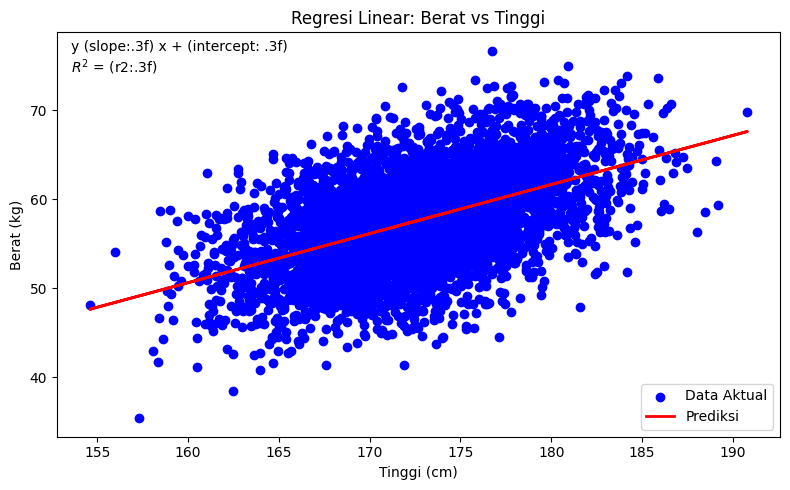

In [10]:
import matplotlib.pyplot as plt

#Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")
#Garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y (slope:.3f) x + (intercept: .3f)\n$R^2$ = (r2:.3f)",
    transform=plt.gca().transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
y_pred_test = model.predict(X_test)
#Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy().flatten(),
    "Berat Prediksi (kg)": y_pred_test.flatten(),
})

#1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil ["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

#2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-108
denom = hasil ["Berat aktual (kg)"].replace(0, np.nan) #antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil ["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762990,8.602990,82.848904
1,171.31,50.33,56.875754,6.545754,86.994329
2,169.29,58.22,55.761071,-2.458929,95.776488
3,163.30,58.92,52.455650,-6.464350,89.028598
4,170.52,63.06,56.439814,-6.620186,89.501766
...,...,...,...,...,...
4995,178.75,56.59,60.981319,4.391319,92.240114
4996,163.05,47.45,52.317694,4.867694,89.741425
4997,166.51,52.46,54.227003,1.767003,96.631715
4998,167.70,49.90,54.883672,4.983672,90.012681


## **Multiple Linear Regresi**

In [12]:
import pandas as pd

# read the csv file with a comma delimiter
df2 = pd.read_csv(path + '/data/stunting_wasting_dataset.csv')
df2.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [13]:
df2.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [14]:
stunting = (df2[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
          .rename(columns={"Jenis Kelamin":"jk", "Umur (bulan)":"umur_bln",
          "Tinggi Badan (cm)": "tinggi_cm", "Berat Badan (kg)": "berat_kg"}).copy())
## Laki-Laki: 1, Perempuan: 0
stunting["jk"] = stunting["jk"].map({"Laki-laki": 1, "Perempuan": 0})
stunting.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [15]:
# Hitung Matriks Korelasi
corr_matriks = stunting.corr()

print(corr_matriks)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


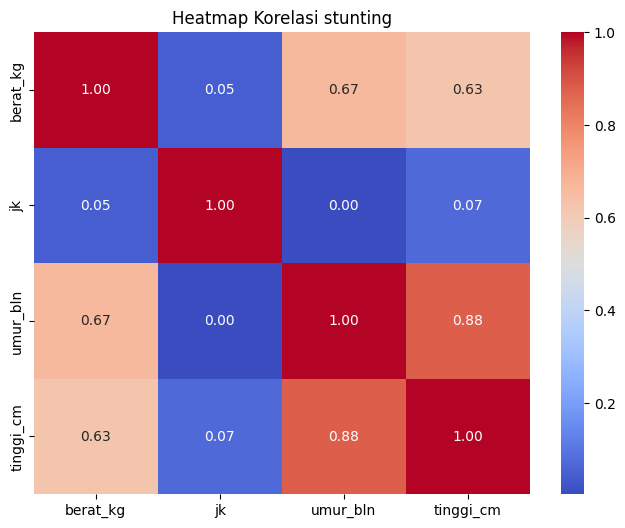

In [16]:
# Heatmap Grafik
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matriks, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi stunting")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

#Misalkan target (Y) adalah berat badan, # Variabel dependen
y = stunting["berat_kg"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = stunting[["umur_bln", "tinggi_cm"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # random_state supaya hasil konsisten
    )

## Cetak Pembagian Data
print("Jumlah data train:", len(X_train))
print("Jumlah data test", len (X_test))
## cek apakah sudah ada constanta pada data training
X_train.head()

Jumlah data train: 80000
Jumlah data test 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [18]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [19]:
# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-------------------------')
print(model.params)
print('-------------------------')
const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']
#print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")

-------------------------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
-------------------------
y = 2.546 + 0.230*x1 + 0.054*x2


In [20]:
# Tampilkan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        06:12:52   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

In [21]:
#Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)
#Prediksi berat badan
y_pred_test = model.predict(X_test_const)
#Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test ["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})
#1) Selisih error (positif overpredict)
hasil["Selisih error (kg)"] = hasil ["Berat Prediksi (kg)"] - hasil ["Berat Aktual (kg)"]

#2) Akurasi per-baris (100 (1/error//aktual)), dibatasi 0-100
denom = hasil ["Berat Aktual (kg)"].replace(0, np.nan) # antisipasi pembagi nol
hasil ["Akurasi (%)"] = (1 - (hasil ["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
hasil

,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845


## **BERAT TI**

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = pd.read_csv(path + '/data/berat_ti2022.csv')
print(data.head())

# Ensure the data for prediction has the same columns as the training data
# The original training data included 'umur_bln' and 'tinggi_cm', plus a constant
# We need to add a dummy 'umur_bln' column and the constant to the new data
data['umur_bln'] = 0 # Assuming umur_bln is not available in this dataset, or can be set to a default
X_test_new = data[['umur_bln', 'tinggi_cm']]
X_test_new_const = sm.add_constant(X_test_new)

y_pred = model.predict(X_test_new_const)
data['prediksi_kg']=y_pred
data["Selisih error (kg)"] = data["prediksi_kg"] - data["actual_berat"]
denom = data["actual_berat"].replace(0, np.nan)
data["Akurasi (%)"] = (1 - (data["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
data

   No.   Nama  tinggi_cm  actual_berat
0    1   Rafa        168          58.5
1    2  Tiara        162          78.2
2    3   Tia         155          52.7
3    4  Keyla        160          70.3
4    5   Bani        183          65.8


,No.,Nama,tinggi_cm,actual_berat,umur_bln,prediksi_kg,Selisih error (kg),Akurasi (%)
0,1,Rafa,168,58.5,0,11.649893,-46.850107,19.914347
1,2,Tiara,162,78.2,0,11.324740,-66.875260,14.481765
2,3,Tia,155,52.7,0,10.945396,-41.754604,20.769252
3,4,Keyla,160,70.3,0,11.216356,-59.083644,15.954987
4,5,Bani,183,65.8,0,12.462775,-53.337225,18.940387


In [25]:
X_testing = data['tinggi_cm']
X_testing

,tinggi_cm
0,168
1,162
2,155
3,160
4,183


In [27]:
import statsmodels.api as sm

X_testing_new = data[['umur_bln', 'tinggi_cm']]
X_testing_new_const = sm.add_constant(X_testing_new)

y_pred_testing = model.predict(X_testing_new_const)
y_pred_testing

,0
0,11.649893
1,11.324740
2,10.945396
3,11.216356
4,12.462775
